# Importing Libraries and reading data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import style
style.use("dark_background")

In [2]:
data = pd.read_csv("C:/Users/Animkush/Desktop/Practice/data/iris.csv")

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Plotting scatter graph on basis of Height and Width of sepal and petal.

C:\Users\Animkush\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x000002A14666DEB8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


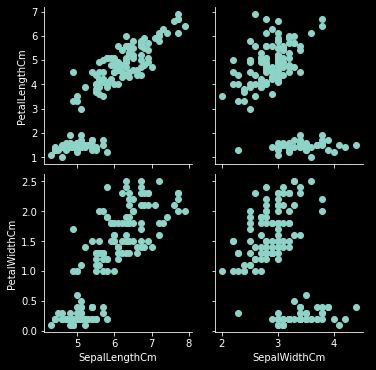

In [4]:
iris_g = sb.PairGrid(data,
                    x_vars=("SepalLengthCm", "SepalWidthCm"),
                    y_vars=("PetalLengthCm", "PetalWidthCm"))

iris_g.map(plt.scatter)
iris_g.add_legend()

In [5]:
data = data.drop(["Species", "Id"], axis=1)
X = np.array(data)

# Using K-Means for Calculating CLusters.

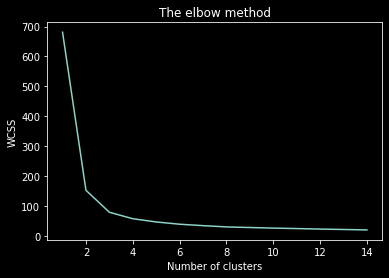

In [7]:
from sklearn.cluster import KMeans
wcs = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcs.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcs)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

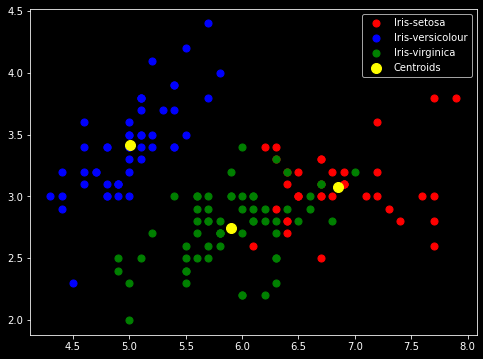

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Conclusion 

We are finally able to find optimal Number of cluster and plot them with the data on graph.